# F20DL Coursework Group 8 2023-24

### Group 8 Members:
- Madihah Anaum
- Tanisha Kasar
- Sneha Sunny
- Dhruv Raghu
- Moses Varghese

# Part 1. Data Analysis and Bayes Nets

## Content
- Coursework Title
- Group Info
- Theory
- Part 1 Study on Given Data Set (Crime Data)
    - Visualization and Initial Data Exploration
    - Naïve Bayes Classifier
    - Create 3 Data Sets Based on Correlated Features
    - Naïve Bayes Classifier on 3 Data Sets
    - Non-Naïve Bayes Classifier
- Final Thoughts

## Theory

### Bayes Theorem & Naive Bayes

#### What is Bayes Theorem?

Bayes' Theorem or Bayes' Rule is a fundamental concept in probability theory that explains how to calculate conditional probability, i.e., the probability of an event occurring based on prior knowledge of related events. For example, the probability of heart disease significantly increases with high cholesterol levels.

Bayes’ Theorem is expressed as follows:

$$
P(A|B) = \frac{P(A) * P(B|A)}{P(B)}
$$

- $P(A|B)$ is the probability of event $A$ occurring given that event $B$ has occurred.
- Similarly, $P(B|A)$ is the probability of event $B$ occurring given that event $A$ has occurred.
- $P(A)$ and $P(B)$ represent the probabilities of events $A$ and $B$ occurring individually.
- In the context of machine learning, $P(A)$ represents our initial belief in event $A$ and $P(A|B)$ represents our updated belief in event $A$ given some new information in event $B$.

#### Naive Bayes

Naive Bayes is a classification algorithm based on the principles of Bayes’ Theorem. The step-by-step process for Naive Bayes is as follows:

**Training**

- The prior probabilities of each class $[P(A), P(B), etc.]$ are calculated based on the training data.
- For each feature in the dataset $(x_i)$, the likelihood for each class $[P(x_i|A), P(x_i|B), etc.]$ is calculated. The likelihood represents the probability of finding a certain feature given the class.

**Prediction**

- For a new data point with features $x_1, x_2, ... x_n$, calculate the posterior probabilities $P(A|x_1,x_2,...x_n), P(B|x_1,x_2,...x_n), etc.$
- Make a classification based on the highest posterior probability.

The ‘Naive’ part in Naive Bayes comes from the assumption that the features are conditionally independent given the class. This is generally not the case when it comes to real-world datasets, however, it simplifies the calculation of likelihood terms making the algorithm computationally efficient while still performing quite well in many practical applications.

There are different variations of Naive Bayes which are tailored to different types of data and their distributions. Some of them include Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes. 

#### Naive Bayes in Scikit-Learn

The Naive Bayes module in Scikit-Learn provides users with different variations of the Naive Bayes classification algorithm.

1.  **Bernoulli Naive Bayes** (`naive_bayes.BernoulliNB`)
    - Suitable for binary data where features indicate the absence or presence of the feature
    - Often used in document classification or spam detection.
2. **Categorical Naive Bayes** (`naive_bayes.CategoricalNB`)
    - Suitable for classification tasks that involve categorical data rather than binary or continuous data.
3. **Complement Naive Bayes** (`naive_bayes.ComplementNB`)
    - Specifically designed for imbalanced datasets, where one class significantly outnumbers the others.
    - Useful in text classification and spam detection
4. **Gaussian Naive Bayes** (`naive_bayes.GaussianNB`)
    - Assumes that features are continuous and assumes a Gaussian distribution for each class.
    - Not suitable for data with discrete or categorical features.
5. **Multinomial Naive Bayes** (`naive_bayes.MultinomialNB`)
    - Appropriate for data with discrete features
    - Often used in natural language processing tasks

## Part 1 Study on Given Data Set (Traffic Signs Data)

### Visualization and Initial Data Exploration

In [1]:
# import basic libaries
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import modules for the first study: Naive Bayes Classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn import metrics

In [3]:
# a custom method for training a variant of a naive bayes classifier
def naive_bayes_classification(model_type, X_train, y_train, X_test, y_test, roc_check=True, clasf_reprt=True):
    """
    trains a specified model with user specified data and then
    prints out the perfomance metric results of the classification
    """
    if model_type == 'GaussianNB':
        clf = GaussianNB()
    elif model_type == 'BernoulliNB':
        clf = BernoulliNB()
    elif model_type == 'MultinomialNB':
        clf = MultinomialNB()
    elif model_type == 'ComplementNB':
        clf = ComplementNB()
    elif model_type == 'CategoricalNB':
        clf = CategoricalNB()
    else:
        raise ValueError("Invalid model type. Supported types: 'Naive Bayes', 'Logistic Regression', 'SVM'")
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # print performance metrics
    if clasf_reprt is True:
        print(classification_report(y_test, y_pred, zero_division=False))
    
    print(f'accuracy             : {metrics.accuracy_score(y_test, y_pred):.5f}')

    print(f'precision (micro)    : {metrics.precision_score(y_test, y_pred, average="micro", zero_division=False):.5f}')
    print(f'precision (macro)    : {metrics.precision_score(y_test, y_pred, average="macro", zero_division=False):.5f}')
    print(f'precision (weighted) : {metrics.precision_score(y_test, y_pred, average="weighted", zero_division=False):.5f}')

    print(f'recall (micro)       : {metrics.recall_score(y_test, y_pred, average="micro", zero_division=False):.5f}')
    print(f'recall (macro)       : {metrics.recall_score(y_test, y_pred, average="macro", zero_division=False):.5f}')
    print(f'recall (weighted)    : {metrics.recall_score(y_test, y_pred, average="weighted", zero_division=False):.5f}')

    print(f'F1 score (micro)     : {metrics.f1_score(y_test, y_pred, average="micro", zero_division=False):.5f}')
    print(f'F1 score (macro)     : {metrics.f1_score(y_test, y_pred, average="macro", zero_division=False):.5f}')
    print(f'F1 score (weighted)  : {metrics.f1_score(y_test, y_pred, average="weighted", zero_division=False):.5f}')

    # ROC
    y_score = clf.predict_proba(X_test)
    if roc_check is True:
        print(f'ROC AUC score (ovo)  : {metrics.roc_auc_score(y_test, y_score, multi_class="ovo"):.5f}')
        print(f'ROC AUC score (ovr)  : {metrics.roc_auc_score(y_test, y_score, multi_class="ovr"):.5f}')

    # TP

    # FP

In [4]:
def run_all_naive_bayes_models(X_train, X_test, y_train, y_test, roc_check=True, run_mode=5):
    """
    runs all the naive bayes models with given X and y data and then prints
    the performance metrics of each naive bayes variant

    all model performances can easily be evaluated and compared
    """

    if run_mode >= 1:
        print("\n\nGaussianNB")
        naive_bayes_classification(model_type="GaussianNB", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, roc_check=roc_check)

    if run_mode >= 2:
        print("\n\nMultinomialNB")
        naive_bayes_classification(model_type="MultinomialNB", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, roc_check=roc_check)

    if run_mode >= 3:
        print("\n\nComplementNB")
        naive_bayes_classification(model_type="ComplementNB", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, roc_check=roc_check)

    if run_mode >= 4:
        print("\n\nBernoulliNB")
        naive_bayes_classification(model_type="BernoulliNB", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, roc_check=roc_check)

    if run_mode == 5:
        print("\n\nCategoricalNB")
        naive_bayes_classification(model_type="CategoricalNB", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, roc_check=roc_check)
    else:
        print("Invalid run mode")

## Part 1 Study on Chosen Data Set (Crime Data)

### Why We Chose this Data Set

Explanation

### Visualization and Initial Data Exploration

In [5]:
# read the chosen data set
chosen_data = pd.read_csv("data/Crime_Data_from_2020_to_Present.csv")

In [126]:
# view the first and last 5 rows
chosen_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815877,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
815878,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
815879,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
815880,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [22]:
chosen_data.shape

(815882, 28)

In [23]:
chosen_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.158820e+05,815882.000000,815882.000000,815882.000000,815882.000000,815882.000000,815882.000000,815873.000000,284434.000000,815872.000000,60117.000000,2013.000000,59.000000,815882.000000,815882.000000
mean,2.160434e+08,1335.614658,10.711521,1117.576886,1.413928,500.777800,29.818963,305.776683,362.906165,500.515309,957.447245,983.647293,990.627119,33.800054,-117.404189
std,1.080151e+07,654.102822,6.092813,609.276287,0.492536,207.816937,21.772828,216.646998,123.759695,207.605385,111.527047,52.758676,28.131402,3.042256,10.560763
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.101222e+08,900.000000,6.000000,621.000000,1.000000,331.000000,8.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.011700,-118.429100
50%,2.201145e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.057900,-118.320500
75%,2.219155e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.162900,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


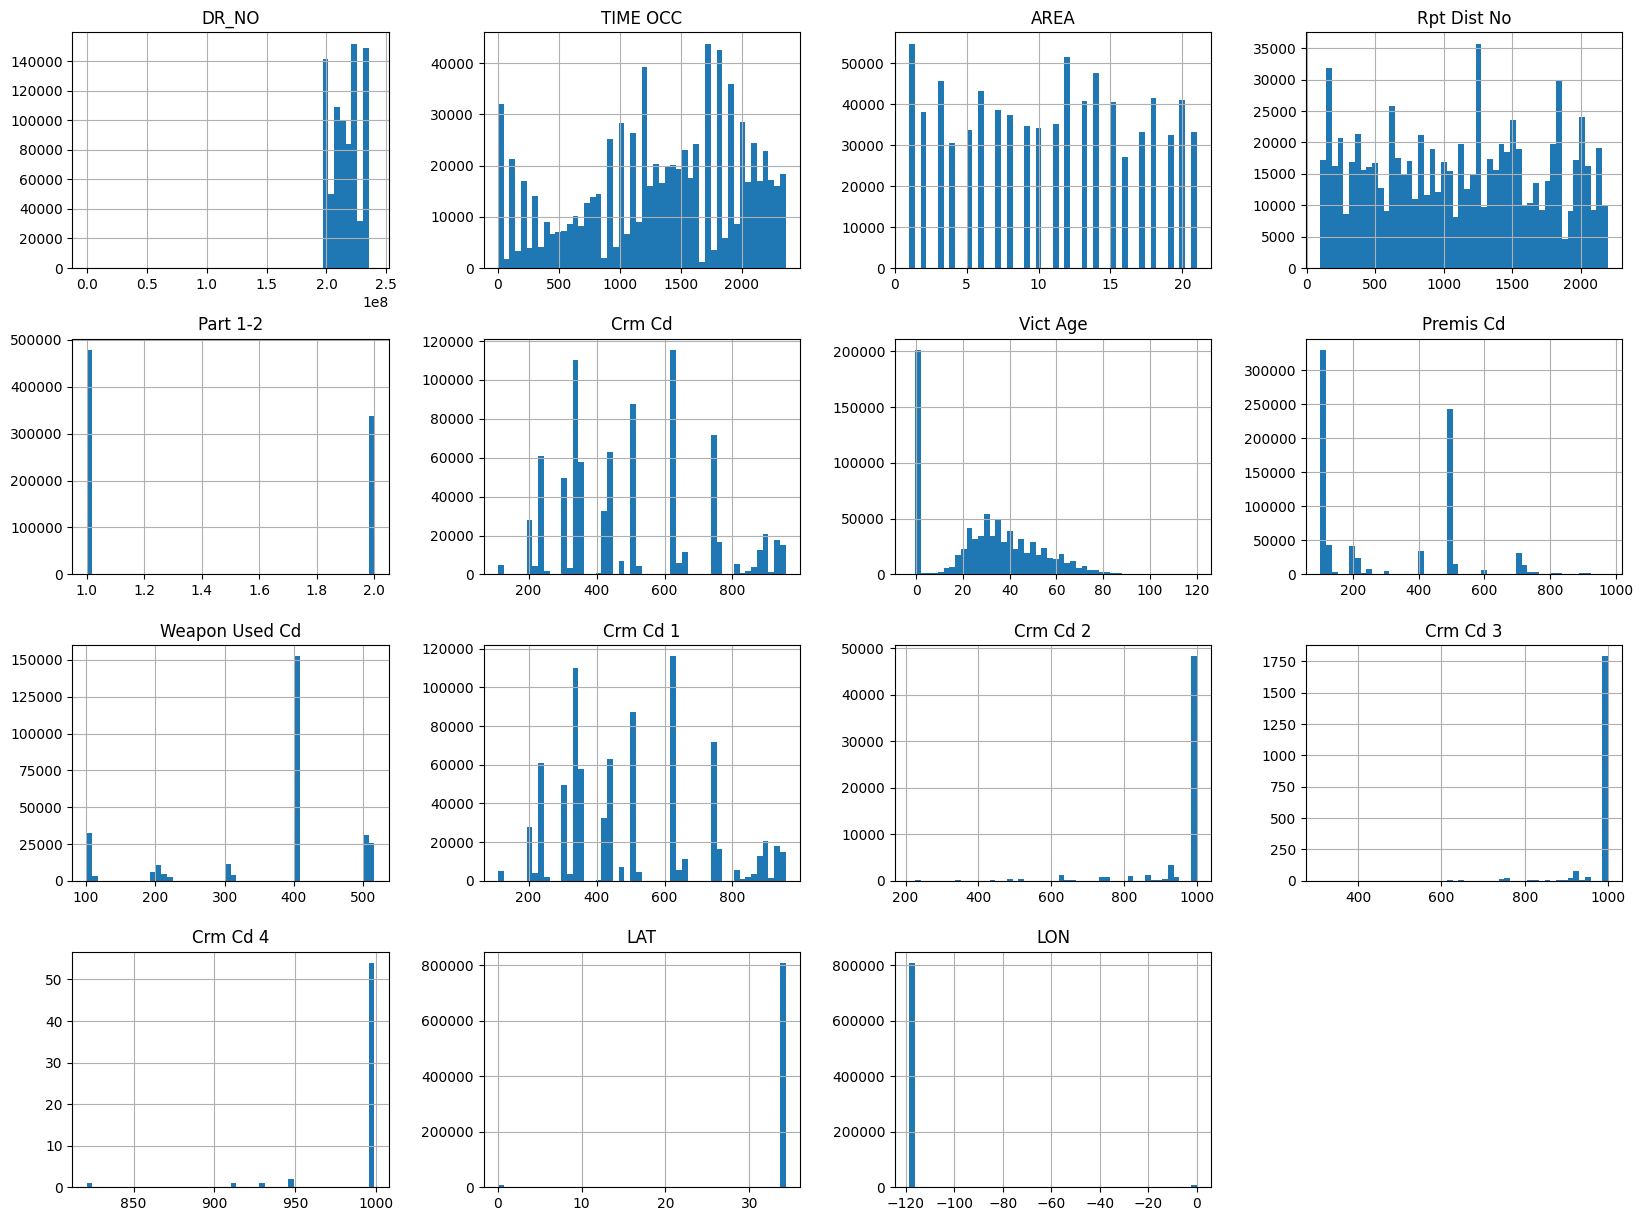

In [127]:
chosen_data.hist(bins=50, figsize=(20,15))
plt.show()

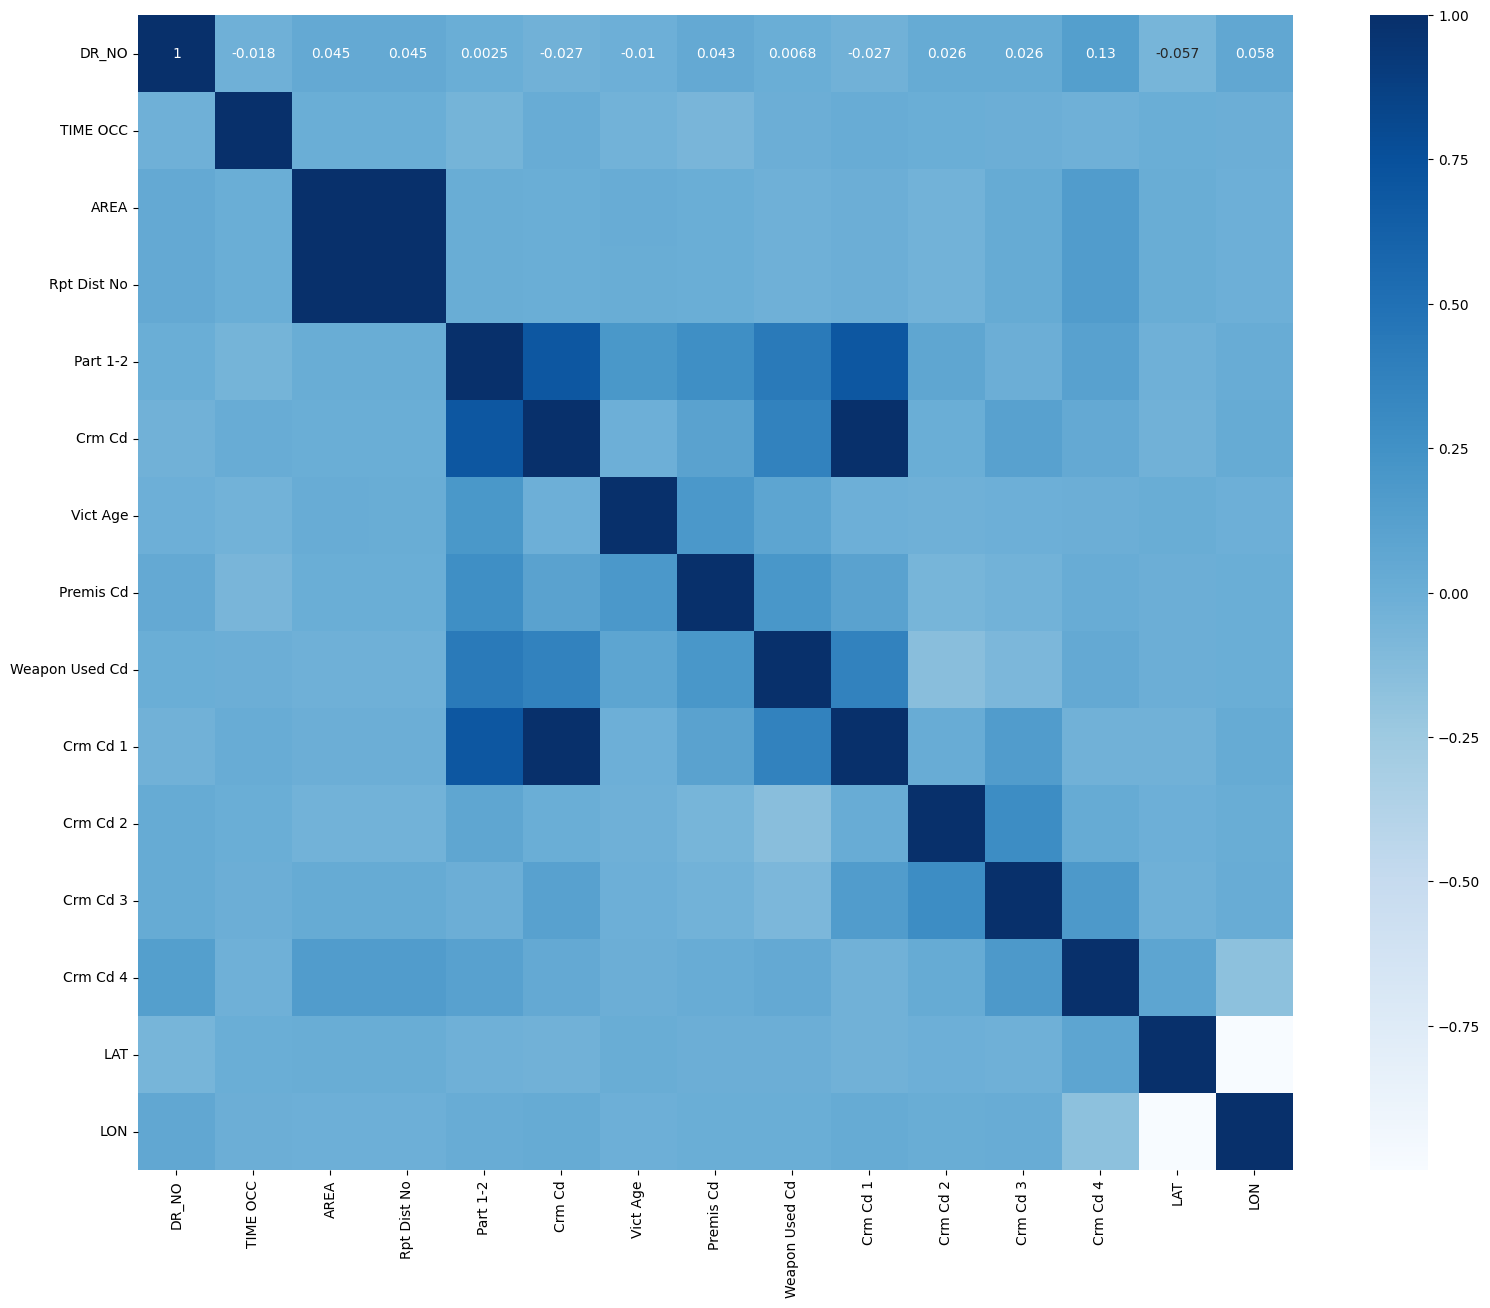

In [128]:
# increases the resolution of the plot
corr_matrix = chosen_data.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, square=True, cmap='Blues', annot=True)
plt.show()

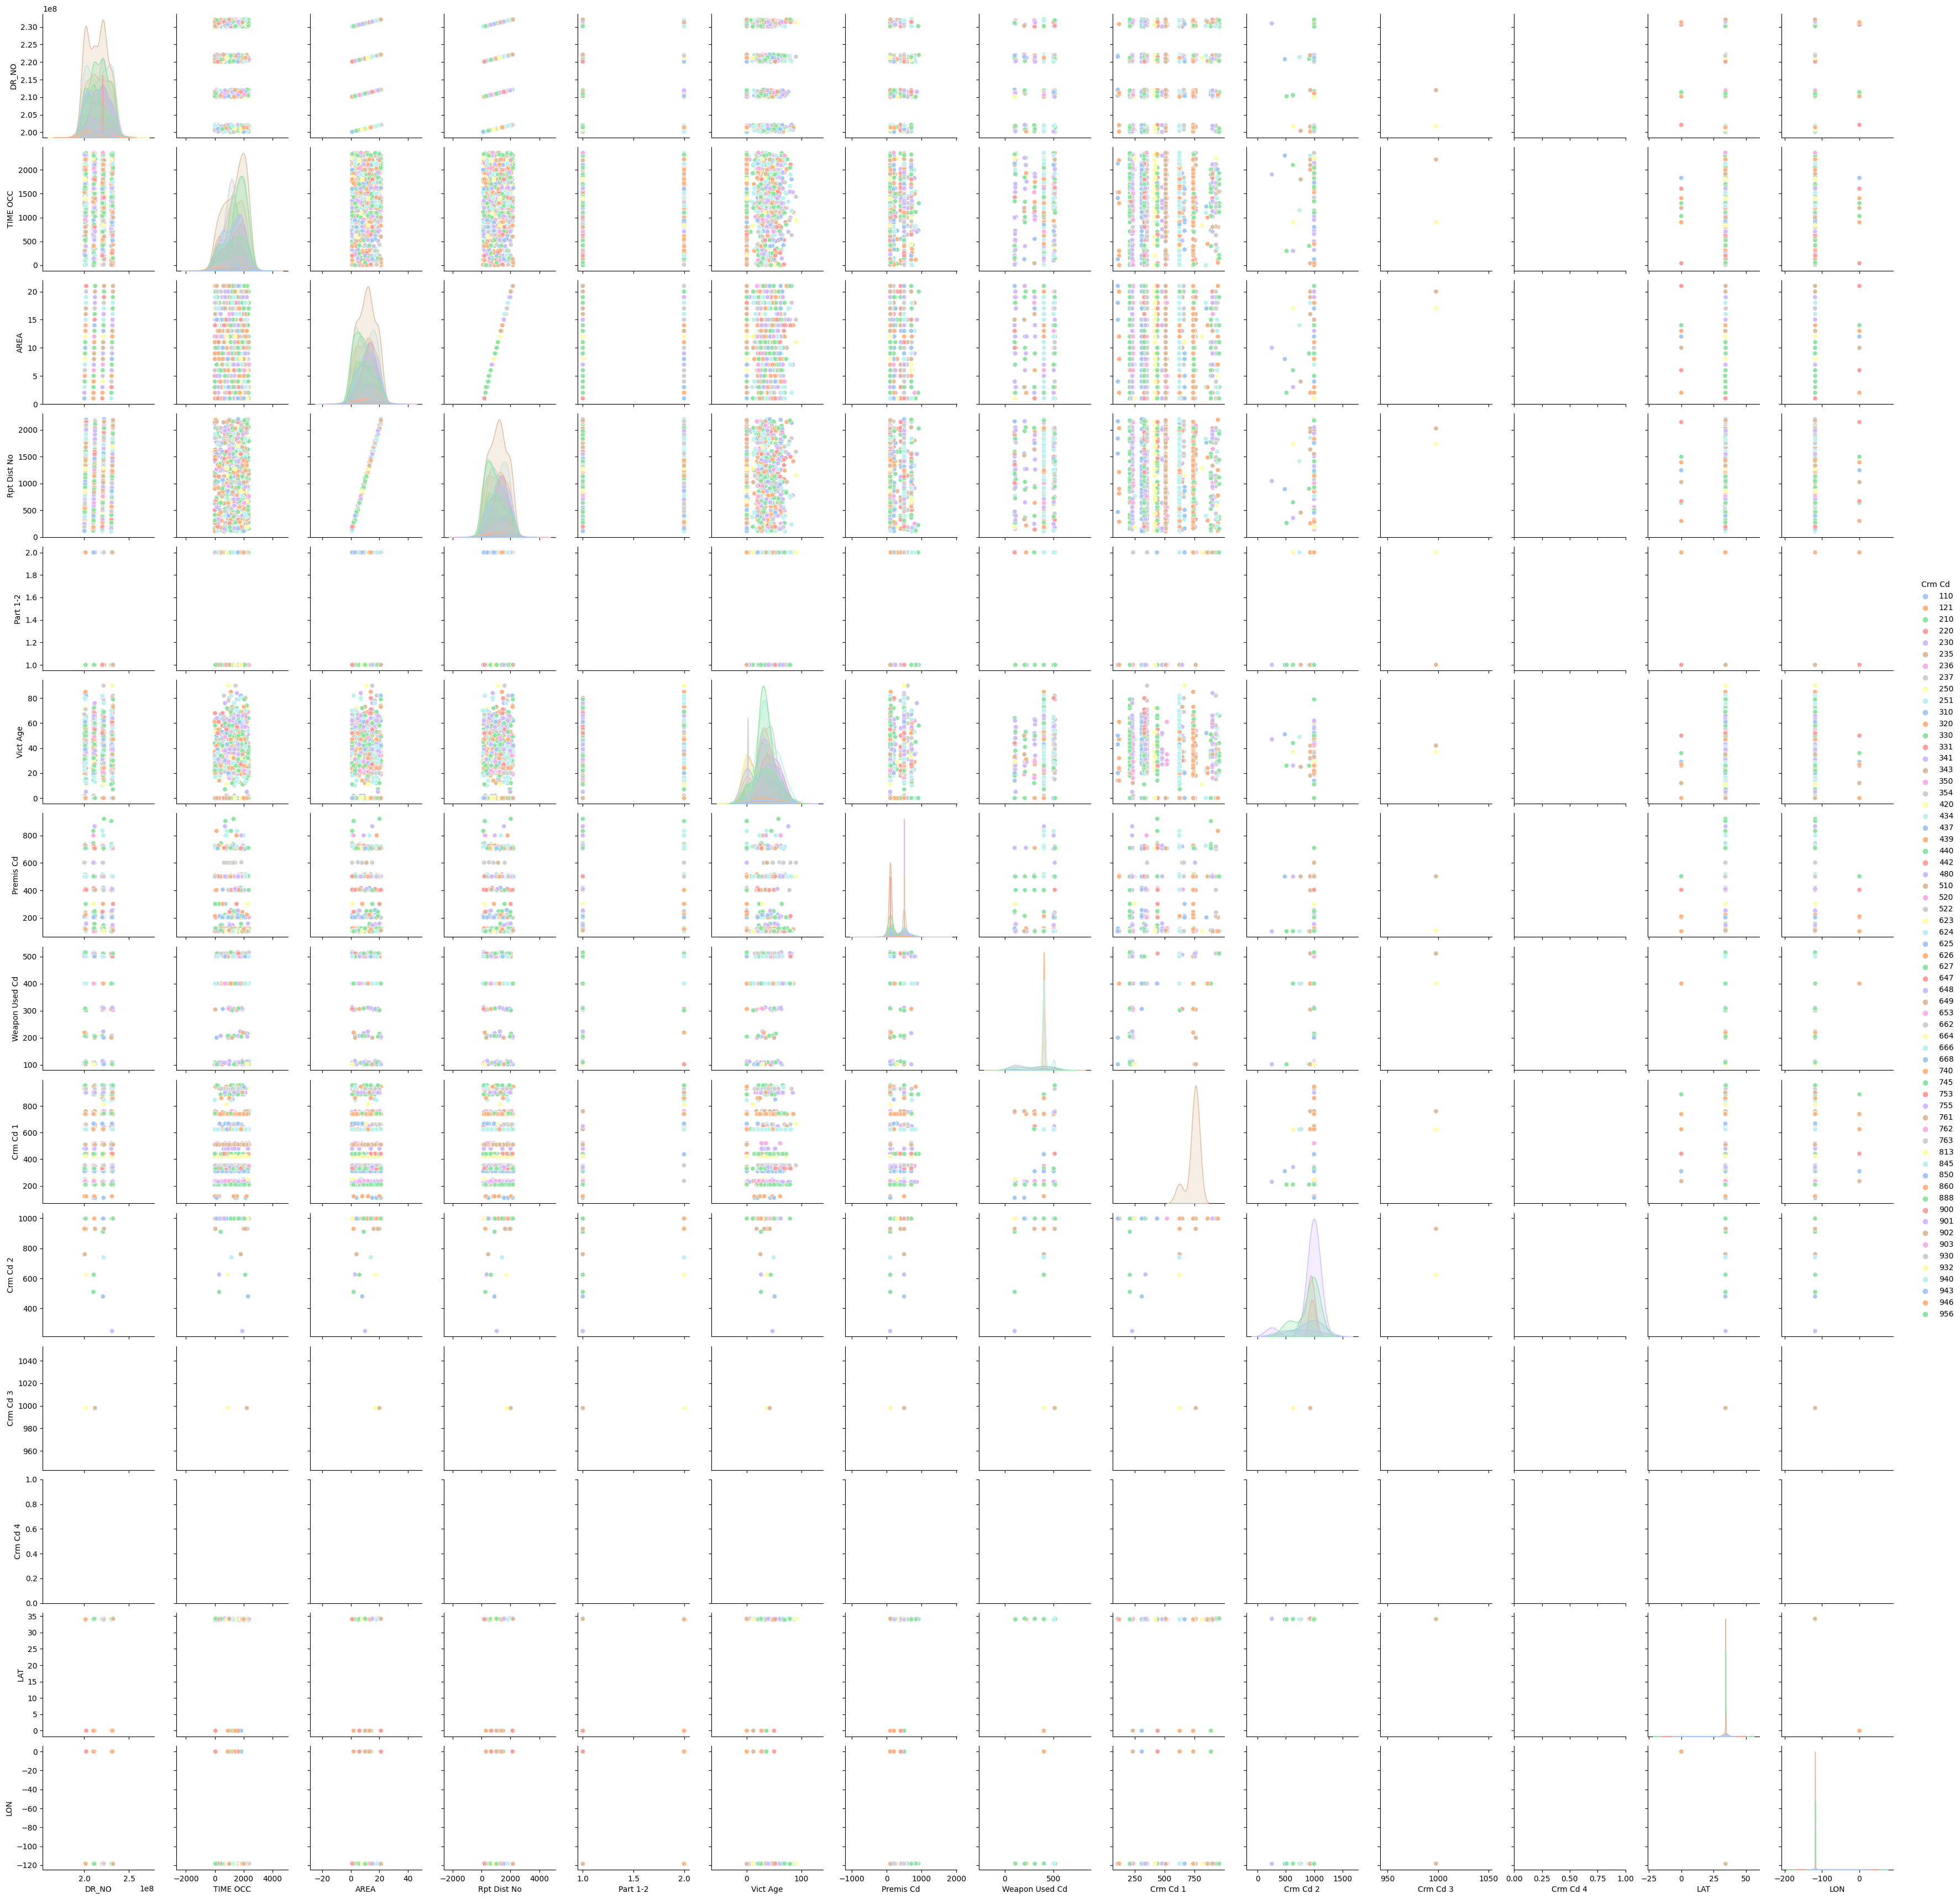

In [326]:
# due to the large size of the data set, sample the first 1000 rows
sns.pairplot(chosen_data.sample(1000), hue="Crm Cd", palette="pastel")
plt.show()

In [ ]:
# map and location

In [ ]:
# scatter plot

#### Data Cleaning

In [11]:
# check for duplicated values
print(chosen_data.duplicated().sum())

0


In [52]:
# check for missing values
chosen_data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112762
Vict Age               0
Vict Sex          107192
Vict Descent      107200
Premis Cd              9
Premis Desc          480
Weapon Used Cd    531448
Weapon Desc       531448
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          755765
Crm Cd 3          813869
Crm Cd 4          815823
LOCATION               0
Cross Street      685361
LAT                    0
LON                    0
dtype: int64

In [10]:
# check the total number of missing values
chosen_data.isnull().sum().sum()

4461367

In [6]:
# fill the missing values with the mode (most frequent) value
chosen_data_cleaned = chosen_data.fillna(chosen_data.mode().iloc[0])
# check for missing values
chosen_data_cleaned.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

#### Data Preparation

##### Using Label Encoding to work with only numerical Data

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [8]:
# create a new data set with only numerics from the chosen data set by using label encoding
chosen_data_num = chosen_data_cleaned.copy()

for col in chosen_data.columns:
    if chosen_data[col].dtype == 'object':  # Check if the column is non-numerical
        chosen_data_num[col] = label_encoder.fit_transform(chosen_data[col])

In [9]:
# drop the location and age columns due to negatives in the data
chosen_data_num = chosen_data_num.drop(columns=["LAT", "LON", "Vict Age"])

In [9]:
chosen_data_num

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street
0,10304468,28,28,2230,3,15,377,2,624,4,...,400.0,65,1,1,624.0,998.0,998.0,998.0,5153,9671
1,190101086,4,0,330,1,1,163,2,624,4,...,500.0,75,3,2,624.0,998.0,998.0,998.0,46525,9671
2,200110444,413,172,1200,1,1,155,2,845,100,...,400.0,79,0,0,845.0,998.0,998.0,998.0,21975,9671
3,191501505,0,0,1730,15,8,1543,2,745,130,...,400.0,79,3,2,745.0,998.0,998.0,998.0,40463,9671
4,191921269,0,0,415,19,7,1998,2,740,129,...,400.0,79,3,2,740.0,998.0,998.0,998.0,13433,9671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815877,231604807,107,103,1800,16,3,1663,2,740,129,...,400.0,79,3,2,740.0,998.0,998.0,998.0,9114,9671
815878,231606525,324,324,1000,16,3,1602,1,230,2,...,400.0,65,3,2,230.0,998.0,998.0,998.0,9633,9671
815879,231210064,408,408,1630,12,0,1239,1,230,2,...,500.0,75,3,2,230.0,998.0,998.0,998.0,43614,9671
815880,230115220,732,728,1,1,1,154,1,352,88,...,400.0,79,3,2,352.0,998.0,998.0,998.0,38797,9671


In [39]:
# create the features and target data sets
features = chosen_data_num.drop(columns=["Crm Cd"])
target = chosen_data_num["Crm Cd"]

In [11]:
negative_counts = (features < 0).sum()
negative_counts

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd Desc       0
Mocodes           0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
dtype: int64

In [11]:
# split the data into train and test sets
chosen_X_train, chosen_X_test, chosen_y_train, chosen_y_test = train_test_split(features, target, test_size=0.3, random_state=0)


In [68]:
# view the dimensions
print(chosen_X_train.shape)
print(chosen_X_test.shape)
print(chosen_y_train.shape)
print(chosen_y_test.shape)

(571117, 24)
(244765, 24)
(571117,)
(244765,)


### Naïve Bayes Classifier

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(chosen_X_train, chosen_y_train)

y_pred = clf.predict(chosen_X_test)

In [14]:
print(f'accuracy             : {metrics.accuracy_score(chosen_y_test, y_pred):.5f}')

print(f'precision (micro)    : {metrics.precision_score(chosen_y_test, y_pred, average="micro", zero_division=False):.5f}')
print(f'precision (macro)    : {metrics.precision_score(chosen_y_test, y_pred, average="macro", zero_division=False):.5f}')
print(f'precision (weighted) : {metrics.precision_score(chosen_y_test, y_pred, average="weighted", zero_division=False):.5f}')

print(f'recall (micro)       : {metrics.recall_score(chosen_y_test, y_pred, average="micro", zero_division=False):.5f}')
print(f'recall (macro)       : {metrics.recall_score(chosen_y_test, y_pred, average="macro", zero_division=False):.5f}')
print(f'recall (weighted)    : {metrics.recall_score(chosen_y_test, y_pred, average="weighted", zero_division=False):.5f}')

print(f'F1 score (micro)     : {metrics.f1_score(chosen_y_test, y_pred, average="micro", zero_division=False):.5f}')
print(f'F1 score (macro)     : {metrics.f1_score(chosen_y_test, y_pred, average="macro", zero_division=False):.5f}')
print(f'F1 score (weighted)  : {metrics.f1_score(chosen_y_test, y_pred, average="weighted", zero_division=False):.5f}')

accuracy             : 0.99986
precision (micro)    : 0.99986
precision (macro)    : 0.98782
precision (weighted) : 0.99986
recall (micro)       : 0.99986
recall (macro)       : 0.97397
recall (weighted)    : 0.99986
F1 score (micro)     : 0.99986
F1 score (macro)     : 0.97752
F1 score (weighted)  : 0.99985


In [12]:
# perform naive bayes with the Gaussian variant
naive_bayes_classification(model_type="GaussianNB",
                           X_train=chosen_X_train, 
                           y_train=chosen_y_train, 
                           X_test=chosen_X_test, 
                           y_test=chosen_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

accuracy             : 0.24474
precision (micro)    : 0.24474
precision (macro)    : 0.03193
precision (weighted) : 0.21116
recall (micro)       : 0.24474
recall (macro)       : 0.03111
recall (weighted)    : 0.24474
F1 score (micro)     : 0.24474
F1 score (macro)     : 0.02211
F1 score (weighted)  : 0.17643


In [71]:
# perform naive bayes with the Multinomial variant
naive_bayes_classification(model_type="MultinomialNB",
                           X_train=chosen_X_train, 
                           y_train=chosen_y_train, 
                           X_test=chosen_X_test, 
                           y_test=chosen_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

accuracy             : 0.05341
precision (micro)    : 0.05341
precision (macro)    : 0.03398
precision (weighted) : 0.19714
recall (micro)       : 0.05341
recall (macro)       : 0.02817
recall (weighted)    : 0.05341
F1 score (micro)     : 0.05341
F1 score (macro)     : 0.00921
F1 score (weighted)  : 0.06361


In [70]:
# perform naive bayes with the Complement variant
naive_bayes_classification(model_type="ComplementNB",
                           X_train=chosen_X_train, 
                           y_train=chosen_y_train, 
                           X_test=chosen_X_test, 
                           y_test=chosen_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

accuracy             : 0.15235
precision (micro)    : 0.15235
precision (macro)    : 0.00708
precision (weighted) : 0.06748
recall (micro)       : 0.15235
recall (macro)       : 0.01292
recall (weighted)    : 0.15235
F1 score (micro)     : 0.15235
F1 score (macro)     : 0.00397
F1 score (weighted)  : 0.04828


In [55]:
# perform naive bayes with the Bernoulli variant
naive_bayes_classification(model_type="BernoulliNB",
                           X_train=chosen_X_train, 
                           y_train=chosen_y_train, 
                           X_test=chosen_X_test, 
                           y_test=chosen_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

accuracy             : 0.20148
precision (micro)    : 0.20148
precision (macro)    : 0.02862
precision (weighted) : 0.14937
recall (micro)       : 0.20148
recall (macro)       : 0.02420
recall (weighted)    : 0.20148
F1 score (micro)     : 0.20148
F1 score (macro)     : 0.01640
F1 score (weighted)  : 0.10440


In [ ]:
# perform naive bayes with the Categorical variant
naive_bayes_classification(model_type="CategoricalNB", 
                           X_train=chosen_X_train, 
                           y_train=chosen_y_train, 
                           X_test=chosen_X_test, 
                           y_test=chosen_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

In [ ]:
# models ordered from worst to best

# categorical, bernoulli, multinomial, complement, gaussian

Conclusions from the above study

### Form 3 Data Sets

In [13]:
# ensure the target and y_train have the same number of unique classes
class_labels = target.unique()
print("target unique classes: ", len(class_labels))

class_label = chosen_y_train.unique()
print("y_train unique classes: ", len(class_label))

target unique classes:  138
y_train unique classes:  138


In [25]:
# Assuming 'chosen_y_train' is your original target variable with 571117 values
num_classes = 10

# Create an empty list to hold separate target DataFrames for each class
target_datasets = []

# Iterate through each class
for class_label in range(num_classes):
    # Create a binary mask for samples belonging to this class
    mask = (chosen_y_train == class_label)
    
    # Create a DataFrame with a column for the binary mask
    df = pd.DataFrame({'Class_{}'.format(class_label): mask.astype(int)})
    
    # Append the DataFrame to the list
    target_datasets.append(df)

# 'target_datasets' is now a list where each element is a DataFrame representing the target dataset for a specific class


In [26]:
target_datasets[0]

,Class_0
294772,0
88766,0
431969,0
793296,0
563839,0
...,...
359783,0
152315,0
117952,0
435829,0


In [27]:
# num_classes = 138
correlations = np.zeros((chosen_X_train.shape[1], num_classes))

for i in range(num_classes):
    class_label = target_datasets[i]  # Get class labels dynamically
    
    correlations[:, i] = np.corrcoef(chosen_X_train, class_label, rowvar=False)[:chosen_X_train.shape[1], -1]


/home/amv2/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/amv2/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [28]:
sorted_indices = np.argsort(np.abs(correlations), axis=0)[::-1]

top_features = {
    i: {
        5: sorted_indices[:5, i],
        10: sorted_indices[:10, i],
        20: sorted_indices[:20, i]
    } for i in range(num_classes)
}

In [29]:
len(top_features)

10

In [30]:
datasets = {k: [] for k in [5, 10, 20]}

for class_label, features_dict in top_features.items():
    for num_features, features in features_dict.items():
        if np.any(features >= chosen_X_train.shape[1]):
            raise ValueError(f"The feature index in target_datasets[{class_label}] is out of bounds.")
        
        class_data = chosen_X_train.iloc[:, features]  # Extract selected features for the class
        class_data = np.hstack((class_data, target_datasets[class_label].values.reshape(-1, 1)))  # Add class labels
        datasets[num_features].append(class_data)


In [31]:
chosen_datasets = {}

for num_features, class_datasets in datasets.items():
    chosen_datasets[num_features] = np.hstack([class_datasets[i] for i in range(num_classes)])


In [32]:
# create the final datasets according to the top 5, 10, and 20 features for each class
chosen_dataset_1 = chosen_datasets[5]
chosen_dataset_2 = chosen_datasets[10]
chosen_dataset_3 = chosen_datasets[20]
# view the datasets
print("Dataset 1 (50 features):\n", chosen_dataset_1)
print("\nDataset 2 (100 features):\n", chosen_dataset_2)
print("\nDataset 3 (200 features):\n", chosen_dataset_3)

Dataset 1 (50 features):
 [[ 9671 37683   550 ...   550  1430     0]
 [ 4488 58879   140 ...   140  1750     0]
 [ 9671 54777   307 ...   299   810     0]
 ...
 [ 7841 58557   397 ...   369  1400     0]
 [ 9671 42421  1119 ...  1119  1240     0]
 [ 9671  6790  1054 ...  1038  2200     0]]

Dataset 2 (100 features):
 [[ 9671 37683   550 ...     1    20     0]
 [ 4488 58879   140 ...     2    73     0]
 [ 9671 54777   307 ...     1   113     0]
 ...
 [ 7841 58557   397 ...     1    21     0]
 [ 9671 42421  1119 ...     1    11     0]
 [ 9671  6790  1054 ...     1    11     0]]

Dataset 3 (200 features):
 [[9.6710e+03 3.7683e+04 5.5000e+02 ... 2.0000e+00 3.1000e+02 0.0000e+00]
 [4.4880e+03 5.8879e+04 1.4000e+02 ... 2.0000e+00 6.2600e+02 0.0000e+00]
 [9.6710e+03 5.4777e+04 3.0700e+02 ... 2.0000e+00 4.2000e+02 0.0000e+00]
 ...
 [7.8410e+03 5.8557e+04 3.9700e+02 ... 2.0000e+00 3.3000e+02 0.0000e+00]
 [9.6710e+03 4.2421e+04 1.1190e+03 ... 2.0000e+00 4.8000e+02 0.0000e+00]
 [9.6710e+03 6.7900e

Dataset 1 (50 features):
 [[0.39243499 0.         0.72048193 0.34628571 0.83574761]
 [0.26122931 0.         0.72048193 0.         0.96327998]
 [0.91962175 1.         0.72048193 0.91885714 0.9670366 ]
 ...
 [0.26004728 0.         0.72048193 0.         0.84157827]
 [0.43735225 0.         0.72048193 0.696      0.92290472]
 [0.43735225 0.         0.72048193 0.69257143 0.87869841]]

Dataset 2 (100 features):
 [[0.39243499 0.         0.72048193 ... 0.99854862 0.2        0.1921793 ]
 [0.26122931 0.         0.72048193 ... 0.99854862 0.5        0.51072961]
 [0.91962175 1.         0.72048193 ... 0.99854862 0.95       0.91940868]
 ...
 [0.26004728 0.         0.72048193 ... 0.99854862 0.9        0.90510253]
 [0.43735225 0.         0.72048193 ... 0.99854862 0.65       0.63996185]
 [0.43735225 0.         0.72048193 ... 0.99854862 0.35       0.34859323]]

Dataset 3 (200 features):
 [[3.92434988e-01 0.00000000e+00 7.20481928e-01 ... 1.92179304e-01
  9.94382022e-01 4.42000000e+02]
 [2.61229314e-01 0.00

### Naïve Bayes Classifier on 3 Data Sets

In [33]:
# create train test split data for data set 1
chosen_X_train_1, chosen_X_test_1, chosen_y_train_1, chosen_y_test_1 = train_test_split(chosen_dataset_1, chosen_y_train.values.ravel(), test_size=.3, random_state=0)
# create train test split data for data set 2
chosen_X_train_2, chosen_X_test_2, chosen_y_train_2, chosen_y_test_2 = train_test_split(chosen_dataset_2, chosen_y_train.values.ravel(), test_size=.3, random_state=0)
# create train test split data for data set 3
chosen_X_train_3, chosen_X_test_3, chosen_y_train_3, chosen_y_test_3 = train_test_split(chosen_dataset_3, chosen_y_train.values.ravel(), test_size=.3, random_state=0)

In [34]:
# for data set 1
run_all_naive_bayes_models(X_train=chosen_X_train_1, 
                           X_test=chosen_X_test_1, 
                           y_train=chosen_y_train_1, 
                           y_test=chosen_y_test_1, 
                           roc_check=False,
                           run_mode=1)



GaussianNB
              precision    recall  f1-score   support

         110       0.00      0.00      0.00       306
         121       0.02      0.00      0.00       644
         122       0.00      0.00      0.00        50
         210       0.11      0.00      0.00      5888
         220       0.00      0.00      0.00       846
         230       0.14      0.00      0.01      9738
         231       0.00      0.00      0.00       179
         235       0.00      0.00      0.00       124
         236       0.00      0.00      0.00      2366
         237       0.00      0.00      0.00       205
         250       0.00      0.00      0.00        92
         251       0.00      0.00      0.00       319
         310       0.00      0.00      0.00     10587
         320       0.00      0.00      0.00       696
         330       0.05      0.00      0.00     10591
         331       0.00      0.00      0.00      6154
         341       0.00      0.00      0.00      5516
         343  

In [27]:
# for data set 2
run_all_naive_bayes_models(X_train=chosen_X_train_2, 
                           X_test=chosen_X_test_2, 
                           y_train=chosen_y_train_2, 
                           y_test=chosen_y_test_2,
                           roc_check=False,
                           run_mode=2)



MultinomialNB


In [41]:
# for data set 3
run_all_naive_bayes_models(X_train=chosen_X_train_3, X_test=chosen_X_test_3, y_train=chosen_y_train_3, y_test=chosen_y_test_3)



GaussianNB
              precision    recall  f1-score   support

         110       1.00      1.00      1.00       260
         113       1.00      1.00      1.00         2
         121       1.00      1.00      1.00       630
         122       1.00      1.00      1.00        56
         210       1.00      1.00      1.00      5696
         220       1.00      1.00      1.00       861
         230       1.00      1.00      1.00      9318
         231       1.00      1.00      1.00       195
         235       1.00      1.00      1.00       105
         236       1.00      1.00      1.00      2270
         237       1.00      1.00      1.00       215
         250       1.00      1.00      1.00        90
         251       1.00      1.00      1.00       273
         310       1.00      1.00      1.00      9869
         320       1.00      1.00      1.00       674
         330       1.00      1.00      1.00     10034
         331       1.00      1.00      1.00      5971
         341  

### Additional Studies

#### Experimenting with Feature Selection Algorithms

In [40]:
features.shape

(815882, 24)

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

print(chosen_X_train.shape)
X_new = SelectKBest(f_classif, k=5).fit_transform(features, target)
print(X_new.shape)

# split the data into train and test sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X_new, target, test_size=0.3, random_state=0)

naive_bayes_classification(model_type="GaussianNB",
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

(571117, 24)


/home/amv2/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


(815882, 5)
accuracy             : 0.99995
precision (micro)    : 0.99995
precision (macro)    : 0.99946
precision (weighted) : 0.99995
recall (micro)       : 0.99995
recall (macro)       : 0.98747
recall (weighted)    : 0.99995
F1 score (micro)     : 0.99995
F1 score (macro)     : 0.99188
F1 score (weighted)  : 0.99994


In [32]:
naive_bayes_classification(model_type="CategoricalNB",
                           X_train=new_X_train, 
                           y_train=new_y_train, 
                           X_test=new_X_test, 
                           y_test=new_y_test, 
                           roc_check=False,
                           clasf_reprt=False)

accuracy             : 0.99182
precision (micro)    : 0.99182
precision (macro)    : 0.61308
precision (weighted) : 0.98873
recall (micro)       : 0.99182
recall (macro)       : 0.53272
recall (weighted)    : 0.99182
F1 score (micro)     : 0.99182
F1 score (macro)     : 0.54540
F1 score (weighted)  : 0.98908


#### Experimenting with Bayes Nets with Complex Heirarchical Structure

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Assuming you have a DataFrame df with columns 'A', 'B', and 'C'
# 'A' and 'B' are parents of 'C' in the Bayesian Network

# Step 1: Create a Bayesian Model
model = BayesianNetwork([('A', 'C'), ('B', 'C')])

# Step 2: Learn CPDs using Maximum Likelihood Estimators
data = pd.DataFrame(data={'A': [0, 0, 1, 1], 'B': [0, 1, 0, 1], 'C': [0, 0, 1, 1]})
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Step 3: Doing exact inference using Variable Elimination
inference = VariableElimination(model)

# Computing the Probability of C given A=1
result = inference.query(variables=['C'], evidence={'A': 1})
print(result)

# Computing the Probability of C given B=1
result = inference.query(variables=['C'], evidence={'B': 1})
print(result)


In [49]:
model = BayesianNetwork()
model.fit(features, estimator=MaximumLikelihoodEstimator)

### Conclusions

## Final Thoughts

Text